<a href="https://colab.research.google.com/github/tytyty93/Coursera/blob/master/CNN%20Exercise(Happy%20or%20Sad).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [ ]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>DESIRED_ACCURACY):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True
                


callbacks = myCallback()

--2020-07-03 10:16:09--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 74.125.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2020-07-03 10:16:09 (155 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [ ]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (2,2), activation='relu', input_shape=(40, 40, 3)),
    tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr=0.01), loss = 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s/',  # This is the source directory for training images
        target_size=(40,40),  # All images will be resized to 300x300
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [ ]:
# This code block should call model.fit and train for
# a number of epochs. 
r = model.fit_generator(train_generator, callbacks=[callbacks], epochs=30)
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/30
3/3 [==============================] - 0s 137ms/step - loss: 215.1129 - accuracy: 0.6500
Epoch 2/30
3/3 [==============================] - 0s 108ms/step - loss: 31.4026 - accuracy: 0.4750
Epoch 3/30
3/3 [==============================] - 0s 104ms/step - loss: 5.5166 - accuracy: 0.4500
Epoch 4/30
3/3 [==============================] - 0s 107ms/step - loss: 0.7070 - accuracy: 0.4750
Epoch 5/30
3/3 [==============================] - 0s 127ms/step - loss: 0.5764 - accuracy: 0.6875
Epoch 6/30
3/3 [==============================] - 0s 108ms/step - loss: 0.5075 - accuracy: 0.7500
Epoch 7/30
3/3 [==============================] - 0s 129ms/step - loss: 0.3651 - accuracy: 0.8375
Epoch 8/30
3/3 [==============================] - 0s 107ms/step - loss: 0.2543 - accuracy: 0.9250
Epoch 9/30
3/3 [==============================] - 0s 125ms/step - loss: 1.1180 - accuracy: 0.6625
Epoch 10/30
3/3 [==============================] - 0s 130ms/step - loss: 0.3539 - accuracy: 0.8125
Epoch 11/30
3/3 

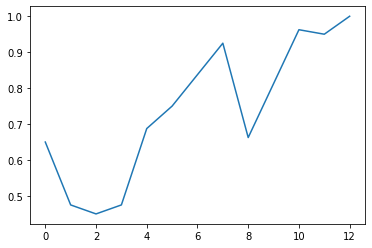

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r.history['accuracy'], label='accuracy')